import packages

In [61]:
library(tidyr)
library(gridExtra)
library(dplyr)
library(datasets)
library(ggplot2)
library(Ecdat)
library(car)
library(multcomp)
library(gmodels)

import datasets

In [32]:

WinningNumbers <- read.csv("Lottery_Mega_Millions_Winning_Numbers__Beginning_2002_Wrangled.csv")
Wins <- read.csv("jackpot winners.csv")
names(Wins)[names(Wins) == "amount..won"] <- "Jackpot"

## Data Exploration

In [33]:
CashByGender <- aggregate(Jackpot~gender, Wins, sum)
CashByGender

gender,Jackpot
F,2717200000
M,8688200000
Mixed,7054500000
Unk,22796300000


In [34]:
Women = data.frame(Wins %>% filter(gender == "F"))
Women

Date,Jackpot,cash.prize,location,state,gender
5/24/2002,2.33e+07,NA,"Chicago, Ill.",IL,F
6/20/2003,2.33e+07,NA,"Baldwin, Md.",MD,F
7/11/2003,2.33e+07,NA,"Uniondale, N.Y.",NY,F
10/7/2003,2.33e+07,NA,Neptune Township N.J.,MJ,F
12/30/2003,1.62e+08,NA,"South Euclid, Ohio",OH,F
1/18/2005,1.31e+08,NA,"Washington, Ga.",GA,F
5/16/2006,9.40e+07,NA,"El Paso, Texas",TX,F
11/14/2006,7.50e+07,NA,"Detroit, Mich.",MI,F
9/21/2007,8.15e+07,NA,"Studio City, Calif.",CA,F
10/5/2007,8.15e+07,NA,"Essex, Md.",MD,F


In [35]:
FWins<-Women$Jackpot
mean(FWins)

[1] 93696552

In [36]:
Men = data.frame(Wins %>% filter(gender == "M"))
Men

Date,Jackpot,cash.prize,location,state,gender
7/16/2002,2.33e+07,NA,"Cliffside Park, N.J.",NJ,M
9/6/2002,2.33e+07,NA,"Kentwood, Mich.",MI,M
2/11/2003,2.33e+07,NA,"Brooklyn, N.Y.",NY,M
8/8/2003,2.33e+07,NA,"Savannah, Ga.",GA,M
9/30/2003,2.33e+07,NA,"Fitzgerald, Ga.",GA,M
11/11/2003,2.33e+07,NA,"Roswell, Ga.",GA,M
11/11/2003,2.33e+07,NA,"Roswell, Ga.",GA,M
3/2/2004,2.10e+07,NA,"Dayton, Ohio",OH,M
7/23/2004,4.70e+07,NA,"Pullman, Mich.",MI,M
7/27/2004,1.00e+07,NA,"Cherry Hill, N.J.",NJ,M


In [37]:
MWins<-Men$Jackpot
mean(MWins)

[1] 107261728

In [38]:
MixedGroups = data.frame(Wins %>% filter(gender == "Mixed"))
Groups

Date,Jackpot,cash.prize,location,state,gender
5/17/2002,2.33e+07,NA,"Chatham, Ill.",IL,Mixed
8/27/2002,2.33e+07,NA,"New York City, N.Y.",NY,Mixed
9/27/2002,2.33e+07,NA,"Mount Prospect, Ill.",IL,Mixed
11/8/2002,2.33e+07,NA,"Hoquiam, Wash.",WA,Mixed
11/19/2002,2.33e+07,NA,"New York City, N.Y.",NY,Mixed
3/14/2003,2.33e+07,NA,"Englewood, N.J.",NJ,Mixed
11/11/2003,2.33e+07,NA,"Battle Creek, Mich.",MI,Mixed
2/20/2004,2.39e+08,NA,"Winchester, Va.",VA,Mixed
5/7/2004,6.70e+07,NA,"Rockaway Beach, N.Y.",NY,Mixed
4/22/2005,2.08e+08,NA,"Port Huron, Mich.",MI,Mixed


In [39]:
GWins<-MixedGroups$Jackpot
mean(GWins)

[1] 105291045

In [40]:
Unknown = data.frame(Wins %>% filter(gender %in% c ("Unk", "Mixed")))
Unknown

Date,Jackpot,cash.prize,location,state,gender
5/17/2002,2.33e+07,NA,"Chatham, Ill.",IL,Mixed
8/27/2002,2.33e+07,NA,"New York City, N.Y.",NY,Mixed
9/27/2002,2.33e+07,NA,"Mount Prospect, Ill.",IL,Mixed
11/8/2002,2.33e+07,NA,"Hoquiam, Wash.",WA,Mixed
11/19/2002,2.33e+07,NA,"New York City, N.Y.",NY,Mixed
12/24/2002,2.33e+07,NA,Unclaimed in N.Y.,NY,Unk
2/18/2003,2.33e+07,NA,"Geraldine, Ala.",AL,Unk
3/14/2003,2.33e+07,NA,"Englewood, N.J.",NJ,Mixed
3/28/2003,2.33e+07,NA,"Randallstown, Md.",MD,Unk
4/25/2003,2.33e+07,NA,"Brooklyn, N.Y.",NY,Unk


In [41]:
UWins<-Unknown$Jackpot
mean(UWins)

[1] 264166372

In [42]:
SingleSex = data.frame(Wins %>% filter(gender %in% c ("M", "F")))
SingleSex

Date,Jackpot,cash.prize,location,state,gender
5/24/2002,2.33e+07,NA,"Chicago, Ill.",IL,F
7/16/2002,2.33e+07,NA,"Cliffside Park, N.J.",NJ,M
9/6/2002,2.33e+07,NA,"Kentwood, Mich.",MI,M
2/11/2003,2.33e+07,NA,"Brooklyn, N.Y.",NY,M
6/20/2003,2.33e+07,NA,"Baldwin, Md.",MD,F
7/11/2003,2.33e+07,NA,"Uniondale, N.Y.",NY,F
8/8/2003,2.33e+07,NA,"Savannah, Ga.",GA,M
9/30/2003,2.33e+07,NA,"Fitzgerald, Ga.",GA,M
10/7/2003,2.33e+07,NA,Neptune Township N.J.,MJ,F
11/11/2003,2.33e+07,NA,"Roswell, Ga.",GA,M


In [43]:
SWins<-SingleSex$Jackpot
mean(SWins)

[1] 103685455

t-test to see if  Women's Jackpots were significantly different than Men's.

In [44]:
t_dep <- t.test(FWins, MWins, paired =FALSE)
t_dep


	Welch Two Sample t-test

data:  FWins and MWins
t = -0.56984, df = 44.679, p-value = 0.5716
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -61520629  34390276
sample estimates:
mean of x mean of y 
 93696552 107261728 


t-test to see if Jackpots for Individual Winners and Single Sex Groups were significantly different than Jackpots for Mixed Groups and Winners where the Sex/Gender was unknown.

In [45]:
t2 <- t.test(SWins, UWins, paired =FALSE)
t2


	Welch Two Sample t-test

data:  SWins and UWins
t = -1.1803, df = 113.19, p-value = 0.2404
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -429853670  108891836
sample estimates:
mean of x mean of y 
103685455 264166372 


t-test to see if Jackpots for Individual Winners and Single Sex Groups were significantly different than Jackpots for Mixed Groups 



In [46]:
t3 <- t.test(SWins, GWins, paired =FALSE)
t3


	Welch Two Sample t-test

data:  SWins and GWins
t = -0.099208, df = 137.98, p-value = 0.9211
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -33606563  30395383
sample estimates:
mean of x mean of y 
103685455 105291045 


Which state has won the most 


In [47]:
CashByState <- aggregate(Jackpot~state, Wins, sum)
CashByState

state,Jackpot
,3.9200e+08
AK,1.7700e+08
AL,2.3300e+07
AZ,5.2200e+08
CA,3.8861e+09
FL,6.5800e+08
GA,1.5807e+09
ID,1.9000e+08
IL,1.6255e+09
IN,5.8250e+08


South Carolina has won the most prize money 

`geom_smooth()` using formula 'y ~ x'


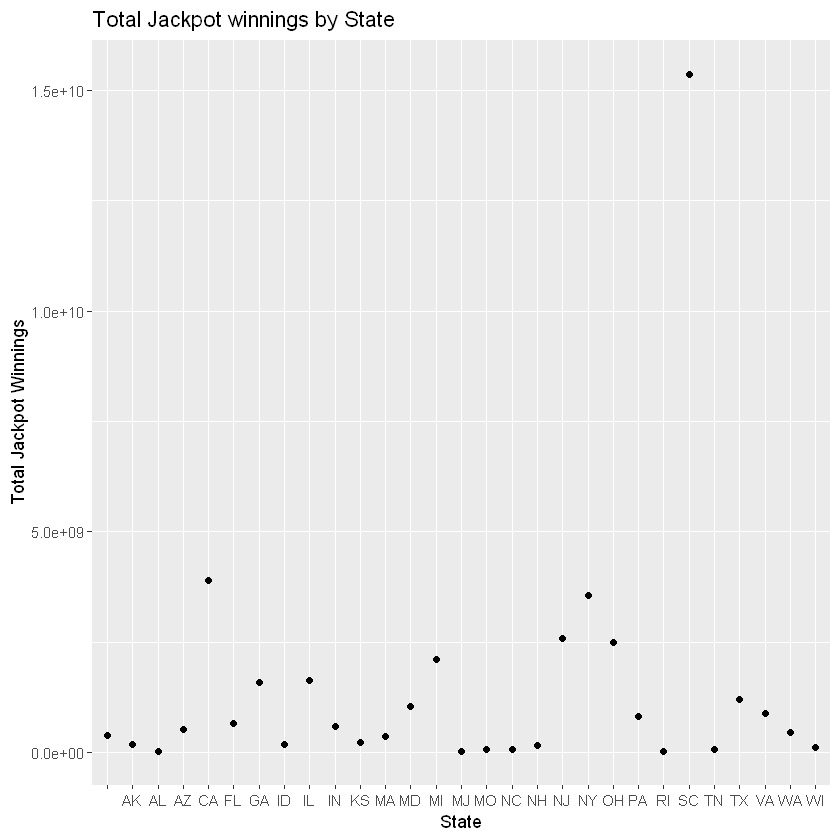

In [48]:
ggplot(CashByState, aes(y = Jackpot, x = state)) + geom_point() + geom_smooth(method='lm', se = TRUE) + ggtitle("Total Jackpot winnings by State")+ ylab("Total Jackpot Winnings") + xlab("State")

did the jackpots change over time?


In [49]:
CashByYear <- aggregate(Jackpot~year, WinningNumbers, sum)
CashByYear

year,Jackpot
2002,2.0970e+08
2003,4.6490e+08
2004,1.1190e+09
2005,1.4260e+09
2006,1.1900e+09
2007,1.7240e+09
2008,1.3030e+09
2009,1.5338e+09
2010,1.1210e+09
2011,1.6140e+09


`geom_smooth()` using formula 'y ~ x'


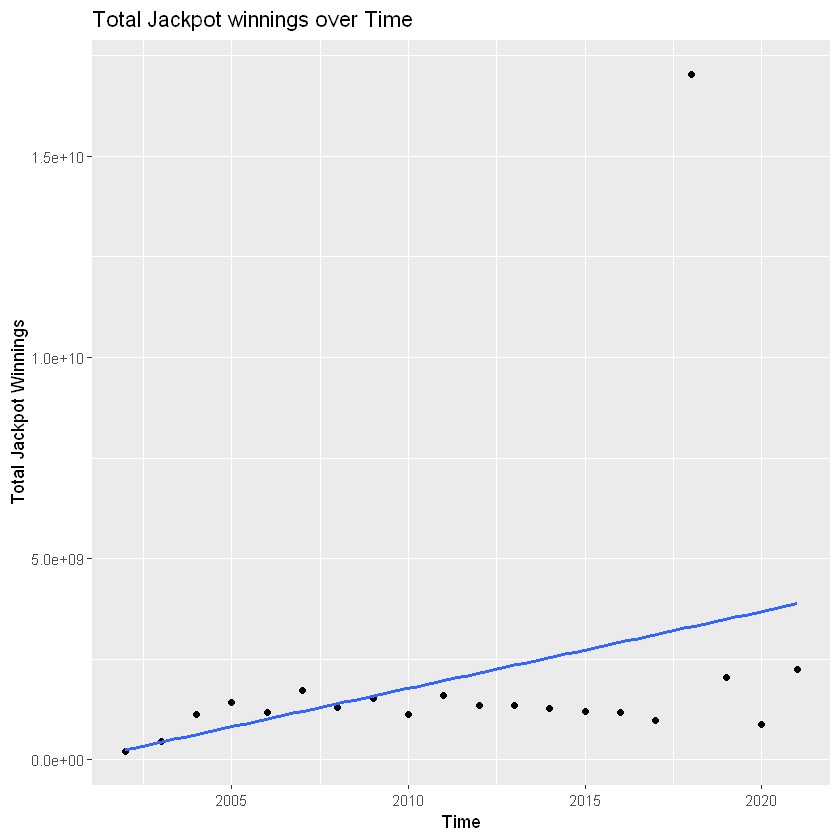

In [50]:
ggplot(CashByYear, aes(y = Jackpot, x = year)) + geom_point() + geom_smooth(method='lm', se = FALSE) + ggtitle("Total Jackpot winnings over Time")+ ylab("Total Jackpot Winnings") + xlab("Time")

## Analysis

## 1. In the Mega Millions, what are the optimal numbers to select in order to achieve a return on investment (ROI)?

### Testing Assumptions



#### 1. Normality


In [ ]:

plotNormalHistogram(cellPhone$Night.Mins)
#  normal   



#### 2. Homogeneity of Variance


In [ ]:

leveneTest(Night.Mins~International.Plan, data=cellPhone)


In [ ]:

# Levene's Test for Homogeneity of Variance (center = median)
#         Df F value Pr(>F)
# group    1  0.8646 0.3525
#       4615  

# Results were not significant, so the assumption is met!



#### 3. Homogeneity of Regression Slopes


In [ ]:

Homogeneity_RegrSlp = lm(Night.Mins~vMail.Plan, data=cellPhone)
anova(Homogeneity_RegrSlp)

# Analysis of Variance Table
# 
# Response: Night.Mins
#               Df    Sum Sq Mean Sq  F value  Pr(>F)
# vMail.Plan    1      488   487.73   0.1909   0.6622
# Residuals    4615 11791809 2555.10  

# This assumption is met. 



#### 4. Sample size


 is met - need 20 per IV or CV and I have 2, so need at least 40 and there are 4617 cases!



### Running the Analysis


In [ ]:

ANCOVA = lm(Night.Mins~vMail.Plan + International.Plan*vMail.Plan, data=cellPhone)
anova(ANCOVA)

# Analysis of Variance Table
# 
# Response: Night.Mins
# Df   Sum Sq Mean Sq F value  Pr(>F)  
# vMail.Plan                       1      488   487.7  0.1909 0.66216  
# International.Plan               1     7979  7978.6  3.1235 0.07724 .
# vMail.Plan:International.Plan    1      435   435.0  0.1703 0.67989  
# Residuals                     4613 11783396  2554.4                  
# ---
#   Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 
# the presence or absence of an international phone plan (International.Plan)
# does not influence the use of nighttime minutes (Night.Mins), even holding
# whether or not the client has a voicemail plan (vMail.Plan) constant.

## 2. In the NYS lottery, what are the optimal locations to play?

### Testing Assumptions



#### 1. Normality



In [ ]:

plotNormalHistogram(cellPhone$Night.Mins)
#  normal   




#### 2. Homogeneity of Variance


In [ ]:

bartlett.test(avgPriceSQRT ~ region, data=avocados1)

# Bartlett test of homogeneity of variances

# data:  avgPriceSQRT by region
# Bartlett's K-squared = 70.75, df = 2, p-value = 4.333e-16

fligner.test(avgPriceSQRT ~ region, data=avocados1)

# Fligner-Killeen test of homogeneity of variances
# 
# data:  avgPriceSQRT by region
# Fligner-Killeen:med chi-squared = 48.139, df = 2, p-value = 3.522e-11


# Does not meet the assumption for homogeneity of variance



#### 3. Sample Size


n = 1014, minium requirement of 20 cases is met



### Running the Analysis


In [ ]:

# Do the Test, with unequal variance
ANOVA1 <- lm(avgPriceSQRT ~ region, data=avocados1)
Anova(ANOVA1, Type="II", white.adjust=TRUE)

# Analysis of Deviance Table (Type II tests)
# 
# Response: avgPriceSQRT
#              Df      F      Pr(>F)    
# region       2     258.85   < 2.2e-16 ***
#   Residuals 1011                     
# ---
#   Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1




#### Post Hocs Analysis


In [ ]:
pairwise.t.test(avocados1$avgPriceSQRT, avocados1$region, p.adjust="bonferroni", pool.sd = FALSE)

# Pairwise comparisons using t tests with non-pooled SD 
# 
# data:  avocados1$avgPriceSQRT and avocados1$region 
# 
#            Albany   Houston
#   Houston  < 2e-16   -      
#   Seattle  8.1e-06   < 2e-16
# 
# P value adjustment method: bonferroni 



##### Find means and draw conclusions


In [ ]:

avocadosMeans <- avocados1 %>% group_by(region) %>% summarize(Mean = mean(AveragePrice))
# A tibble: 3 x 2
#     region   Mean
#      <chr>   <dbl>
#   1 Albany   1.56
#   2 Houston  1.05
#   3 Seattle  1.44

# There is no significant difference in average price between the regions.


## 3. In NYS, how much does the lottery give back to society? Do certain counties benefit more?

### Testing Assumptions



#### 1. Normality


In [ ]:

plotNormalHistogram(cellPhone$Night.Mins)
#  normal   



#### 2. Homogeneity of Variance


In [ ]:
Homogeneity_RegrSlp = lm(Night.Mins~vMail.Plan, data=cellPhone)
anova(Homogeneity_RegrSlp)

# Analysis of Variance Table
# 
# Response: Night.Mins
#               Df    Sum Sq Mean Sq  F value  Pr(>F)
# vMail.Plan    1      488   487.73   0.1909   0.6622
# Residuals    4615 11791809 2555.10  

# This assumption is met.


#### 3. Homogeneity of Regression Slopes


In [ ]:

Homogeneity_RegrSlp = lm(Night.Mins~vMail.Plan, data=cellPhone)
anova(Homogeneity_RegrSlp)

# Analysis of Variance Table
# 
# Response: Night.Mins
#               Df    Sum Sq Mean Sq  F value  Pr(>F)
# vMail.Plan    1      488   487.73   0.1909   0.6622
# Residuals    4615 11791809 2555.10  

# This assumption is met. 



#### 4. Sample size


 is met - need 20 per IV or CV and I have 2, so need at least 40 and there are 4617 cases!


### Running the Analysis

In [ ]:
ANCOVA = lm(Night.Mins~vMail.Plan + International.Plan*vMail.Plan, data=cellPhone)
anova(ANCOVA)

# Analysis of Variance Table
# 
# Response: Night.Mins
# Df   Sum Sq Mean Sq F value  Pr(>F)  
# vMail.Plan                       1      488   487.7  0.1909 0.66216  
# International.Plan               1     7979  7978.6  3.1235 0.07724 .
# vMail.Plan:International.Plan    1      435   435.0  0.1703 0.67989  
# Residuals                     4613 11783396  2554.4                  
# ---
#   Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 
# the presence or absence of an international phone plan (International.Plan)
# does not influence the use of nighttime minutes (Night.Mins), even holding
# whether or not the client has a voicemail plan (vMail.Plan) constant.